# 1. Introduction

Real Estate is property consisting of Land and houses on it, along with it natural resources such as crops, minerals or water. The business of Real Estate is the profession of buying, selling and renting Lands, houses.
Residences can be classified by if and how they are connected to neighboring residences and Land.

# 2. Overview of the Study

This field study concerns the housing rates in the various regions of Melbourne, Australia
Business Problem: What are the factors affecting the Price of houses in certain highly populated regions in Melbourne

# 3. An empirical study of the house Prices in various regions of Melbourne

## 3.1 Overview

Melbourne is currently experiencing a housing bubble. The specific objetive of this study is to identify the influence of Distance from CBD (Central Business District) and Landsize that affects the Prices of Houses. 

This dataset includes Address, Type of Real Estate, Suburb, Method of selling, ROoms, Price, Agent, Date of Sale and Distance

## 3.2 Data

This Data was scrapped from kaggle.com . The variablles used in our analysis as sollows:

Suburb: Suburb

Rooms: Number of Rooms

Price: Price in Dollars

###### Method: Status of Property Sale

S- property sold

SP- property sold prior

PI- property passed in

PN- Sold prior not disclosed 

SN- Sold not disclosed

VB- Vendor Bid

W- Withdrawn prior to auction

SA- sold after auction

SS- Sold after auction price not disclosed

###### Type of house:

h - house, cottage, villa, semi, terrace

u - unit, duplex

t -  townhouse


###### SellerG
Real Estate Agent

###### Date
Date Sold

###### Distance
Distance from CBD

###### Regionname
General region(West, Northwest, NortEast ......etc)

###### Property count
Number of properties that exist in the Suburb

###### Bedroom2
Number of Bedroom

###### Bathroom
Number of Bathrooms

###### Car
Number of Carslots

###### Landsize
landsize

###### YearBuilt
Year the House was built

We explore a data set to determine the factors that influences the prices of houses in Melbourne.

For this analysis we source our data from kaggle. Kaggle is an open source site with over 5000 dataset that are downloadable.


We begin by importing the libraries that would be used for this analysis

Then import our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Next we explore and clean the dataset. We do this by:

1. checking for missing values

2. we check the size and information about the data

In [3]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

We discover that some data are missing from this dataframe.

there are about 6450 missing data in BuildingArea column, 5375 missing in YEarBuilt, 62 in Car and 1369 in CouncilArea

In [4]:
print(df.shape)
print(df.info())

(13580, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64

There are 13580 rows and 21 columns in our data set.

We check for the categorical and numerical data.

Then we fix the missing data. We can fix thus by either using the mean, the mode of each column.

We can also fix it by using back fill and front fill.

In [5]:
categorical =  df.select_dtypes('O')
categorical.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan


In [6]:
numerical = df.select_dtypes(('int', 'float'))
numerical.head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [13]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mean()).astype('int32')
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])
df['Car'] = df['Car'].fillna(method= 'bfill')

df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

The Data has been cleaned up and all missing values have been filled up. 

Now we begin to explore our data to find patterns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


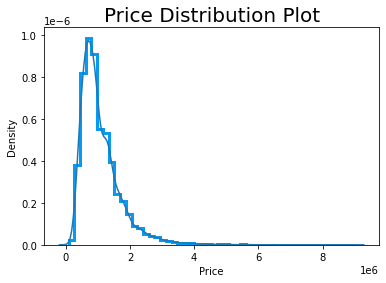

In [19]:
import seaborn as sns

sns.distplot(df.Price, kde = True, 
             label = 'YearBuilt', 
             hist_kws = {"histtype": "step", "linewidth": 3, "alpha": 1,
                                                                         "color" : sns.xkcd_rgb["azure"]})
plt.title('Price Distribution Plot', fontsize = 20)
plt.show()

In [30]:
df = df[df['Landsize'] > 120]

print(df.shape)

(11067, 21)


From the distribution plot, we found out that the Price data is normally distributed.

Next we plot a scatter plot to show Distance Vs Price

We also plot a scatter plot for Landsize Vs price


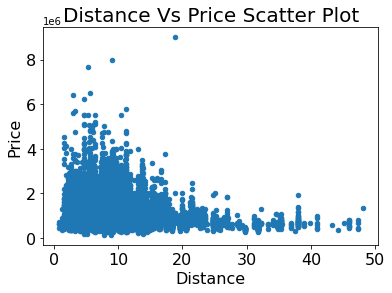

In [31]:
df.plot(kind = 'scatter', x ='Distance', y ='Price', fontsize = 16)
plt.xlabel ('Distance', fontsize = 16)
plt.ylabel('Price', fontsize = 16)

plt.title('Distance Vs Price Scatter Plot', fontsize = 20)
plt.show()

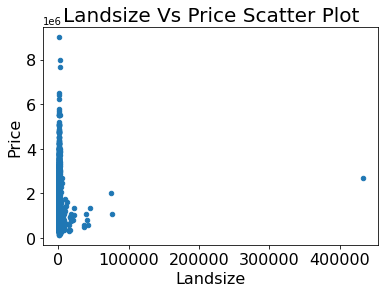

In [32]:
df.plot(kind = 'scatter', x ='Landsize', y ='Price', fontsize = 16)
plt.xlabel ('Landsize', fontsize = 16)
plt.ylabel('Price', fontsize = 16)

plt.title('Landsize Vs Price Scatter Plot', fontsize = 20)
plt.show()

###### Hypothesis 1: The Price of house is correlated with Distance and Landsize

In [35]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,11067.000000,1.106700e+04,11067.000000,11067.000000,11067.000000,11067.000000,11067.000000,11067.000000,11067.000000,11067.000000,11067.000000,11067.000000,11067.000000
mean,3.145206,1.164619e+06,10.968447,3105.039758,3.116834,1.598084,1.727202,680.478269,160.161207,1962.620764,-37.806504,144.997300,7301.290594
std,0.882366,6.544895e+05,5.954358,95.589532,0.901128,0.712408,0.992135,4411.473366,432.942130,29.224598,0.083967,0.111804,4387.539652
min,1.000000,1.310000e+05,0.700000,3000.000000,0.000000,0.000000,0.000000,121.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,3.000000,7.250000e+05,7.000000,3044.000000,3.000000,1.000000,1.000000,301.000000,135.000000,1960.000000,-37.857900,144.922615,4019.000000
50%,3.000000,9.900000e+05,10.500000,3083.000000,3.000000,1.000000,2.000000,548.000000,151.967650,1964.000000,-37.795890,145.005300,6482.000000
75%,4.000000,1.415000e+06,13.700000,3147.000000,4.000000,2.000000,2.000000,687.000000,151.967650,1970.000000,-37.749000,145.068900,9758.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


##### To check the number of the different types of properties by region

In [93]:
region_by_table = pd.crosstab(df.Regionname, df.Type)
region_by_table

Type,h,t,u
Regionname,,,
Eastern Metropolitan,1163,103,127
Eastern Victoria,49,0,3
Northern Metropolitan,2564,170,319
Northern Victoria,41,0,0
South-Eastern Metropolitan,386,20,28
Southern Metropolitan,2582,336,544
Western Metropolitan,2228,184,188
Western Victoria,32,0,0


###### to check the status of property sale per type per region

In [94]:
sell_type_per_reg = df.groupby(['Regionname', 'Type', 'Method'])['Type'].count().unstack().fillna(0)
sell_type_per_reg

Method                              PI       S    SA     SP     VB
Regionname                 Type                                   
Eastern Metropolitan       h     135.0   820.0  12.0  106.0   90.0
                           t      14.0    66.0   2.0   10.0   11.0
                           u      11.0    95.0   0.0    9.0   12.0
Eastern Victoria           h       3.0    28.0   1.0   14.0    3.0
                           u       0.0     2.0   0.0    1.0    0.0
Northern Metropolitan      h     238.0  1863.0  12.0  302.0  149.0
                           t      14.0   115.0   0.0   25.0   16.0
                           u      29.0   185.0   3.0   72.0   30.0
Northern Victoria          h       1.0    27.0   1.0   11.0    1.0
South-Eastern Metropolitan h      32.0   280.0   3.0   58.0   13.0
                           t       0.0    20.0   0.0    0.0    0.0
                           u       1.0    22.0   0.0    4.0    1.0
Southern Metropolitan      h     386.0  1698.0  25.0  155.0  318.0
                           t      48.0   229.0   2.0   24.0   33.0
                           u      67.0   361.0   4.0   53.0   59.0
Western Metropolitan       h     219.0  1494.0  12.0  389.0  114.0
                           t      25.0   110.0   0.0   39.0   10.0
                           u      16.0   120.0   3.0   35.0   14.0
Western Victoria           h       2.0    26.0   0.0    4.0    0.0

###### To plot a boxplot to check for prices in regions

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Price of houses')

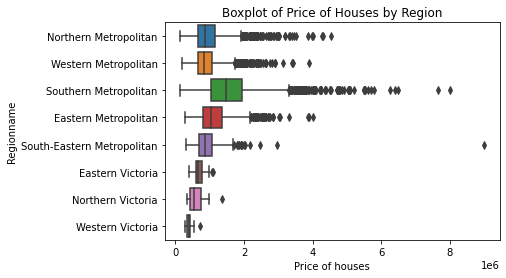

In [95]:
sns.boxplot(df.Price, df.Regionname)
plt.title("Boxplot of Price of Houses by Region")
plt.xlabel("Price of houses")

### Insights: 

##### Western Victoria has the lowest median house price

#####  Southern Metropolitan has the highest median house price

#####  In the South Eastern Metropolitan region, there is a shockingly high outlier

##### Next we plot a boxplot to show Landsize Vs Region name

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Landsize of houses')

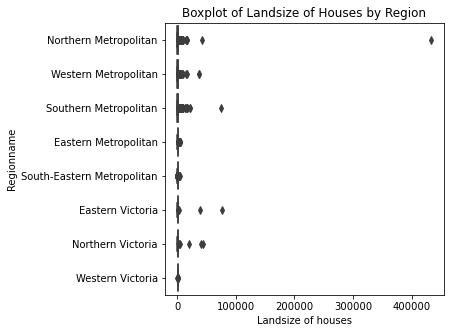

In [41]:
plt.figure(figsize = (5, 5))
sns.boxplot(df.Landsize, df.Regionname)
plt.title("Boxplot of Landsize of Houses by Region")
plt.xlabel("Landsize of houses")

##### Next we plot a boxplot to show Distance Vs Type of Houses

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'distance')

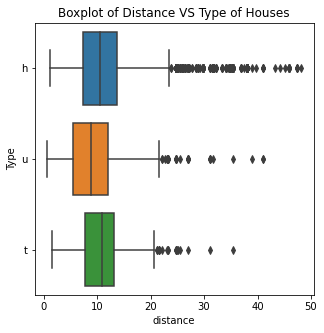

In [43]:
plt.figure(figsize = (5, 5))
sns.boxplot(df.Distance, df.Type)
plt.title("Boxplot of Distance VS Type of Houses")
plt.xlabel("distance")

##### Next we plot a histogram for Distance

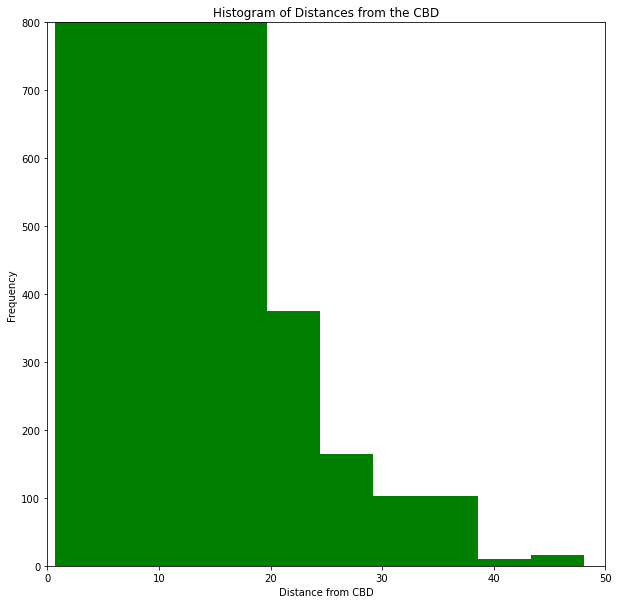

In [53]:
df.Distance.plot(kind = 'hist',
                bins =10,
                figsize = (10, 10), color = 'green')

plt.title("Histogram of Distances from the CBD")
plt.xlabel("Distance from CBD")
plt.xlim([0, 50])
plt.ylim([0, 800])

plt.show()

##### Next we plot a histogram for Number of Bedrooms

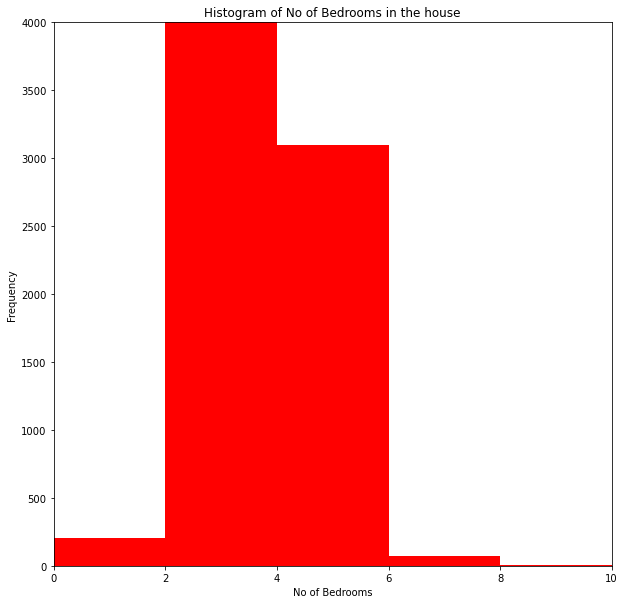

In [54]:
df.Bedroom2.plot(kind = 'hist',
                bins =10,
                figsize = (10, 10), color = 'red')

plt.title("Histogram of No of Bedrooms in the house")
plt.xlabel("No of Bedrooms")
plt.xlim([0, 10])
plt.ylim([0, 4000])

plt.show()

##### Next we plot a histogram for Number of Bathrooms

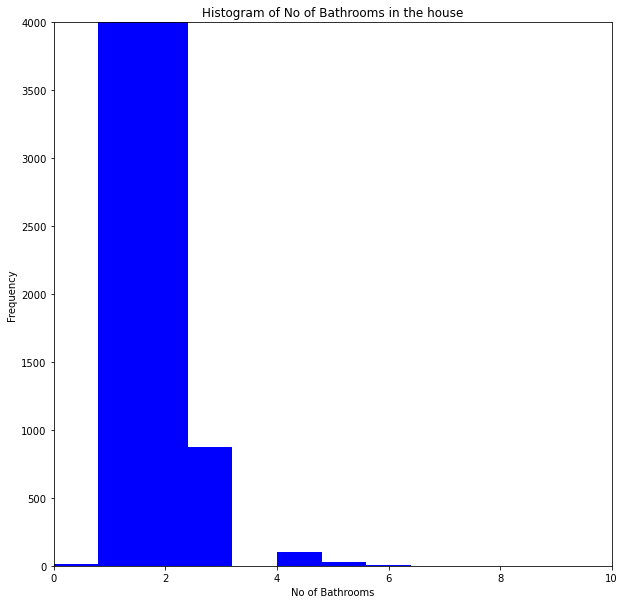

In [56]:
df.Bathroom.plot(kind = 'hist',
                bins =10,
                figsize = (10, 10), color = 'blue')

plt.title("Histogram of No of Bathrooms in the house")
plt.xlabel("No of Bathrooms")
plt.xlim([0, 10])
plt.ylim([0, 4000])

plt.show()

##### Next we plot a histogram for Number of Carslots

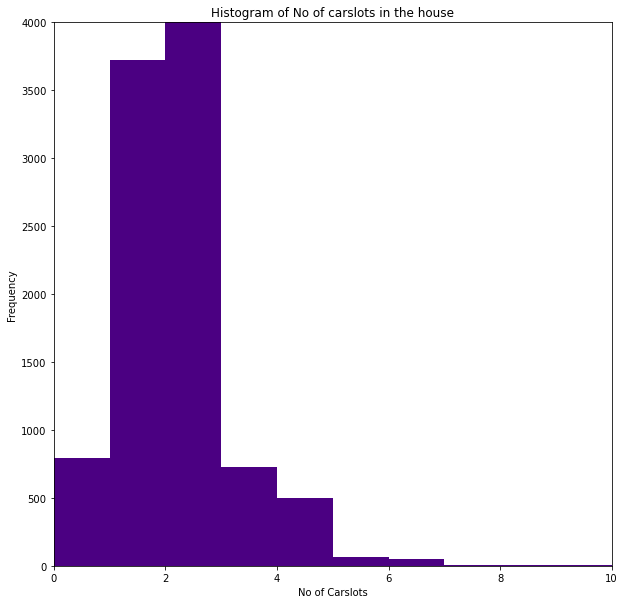

In [63]:
df.Car.plot(kind = 'hist',
                bins =10,
                figsize = (10, 10), color = 'indigo')

plt.title("Histogram of No of carslots in the house")
plt.xlabel("No of Carslots")
plt.xlim([0, 10])
plt.ylim([0, 4000])

plt.show()

 ## Insights

From the Distance from CbD histogram, we see a very stong right skew in the data indicating that very few houses are extremely far away from the CBD

We can also see that majority of the houses have 2-4 bedrooms, 1-3 bathrooms and 1-2 Carslots.

We also note that there are outliers in these histograms

In [69]:
cor =  df[["Rooms", "Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize"]].corr()

print(round(cor, 3))

          Rooms  Price  Distance  Bedroom2  Bathroom    Car  Landsize
Rooms     1.000  0.411     0.199     0.927     0.585  0.337    -0.004
Price     0.411  1.000    -0.280     0.387     0.430  0.169     0.020
Distance  0.199 -0.280     1.000     0.204     0.088  0.205     0.006
Bedroom2  0.927  0.387     0.204     1.000     0.574  0.335    -0.003
Bathroom  0.585  0.430     0.088     0.574     1.000  0.276     0.027
Car       0.337  0.169     0.205     0.335     0.276  1.000     0.011
Landsize -0.004  0.020     0.006    -0.003     0.027  0.011     1.000


# Hypothesis Testing

## Testing Correlation between Distance and Price of Houses


###### H0 (Null Hypothesis): There is no significant difference between distance and Prices of House. 

###### H1(Alternative Hypothesis) : There is  significant difference between Distance and Prices of House. 

In [73]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df.Price, df.Distance)
print(pearson_coef)
print(p_value)

-0.2795624315215058
7.988613274724466e-198


We reject the null hypothesis because the p < 0.05. Hence a strong correlation

## Testing Correlation between Landsize and Price of Houses


###### H0(Null Hypothesis) : There is no significant difference between Landsize and Prices of House. 

##### H1 (Alternative Hypothesis): There is significant difference between Landsize and Prices of House. 

In [78]:
pearson_coef, p_value = stats.pearsonr(df.Price, df.Landsize)
print(pearson_coef)
print(p_value)

0.020097588624348323
0.03449501255824723


We reject the null hypothesis because the p < 0.05. Hence a strong correlation. This means that the Landsize is correlated with the Price of house

## Testing Correlation between No of Rooms and Price of Houses


###### H0(Null Hypothesis) : There is no significant difference between No of Rooms and Prices of House.
###### H1 (Alternative Hypothesis) : There is  significant difference between No of Rooms and Prices of House.

In [83]:
pearson_coef, p_value = stats.pearsonr(df.Price, df.Bedroom2)
print(pearson_coef)
print(p_value)

0.3869866814030185
0.0


We reject the null hypothesis because the p < 0.05. Hence a strong correlation. This means that the No of Rooms is correlated with the Prices of house

##### Top 10 Surburb

We plot some visualization to check the top 10 Suburb and Council Area

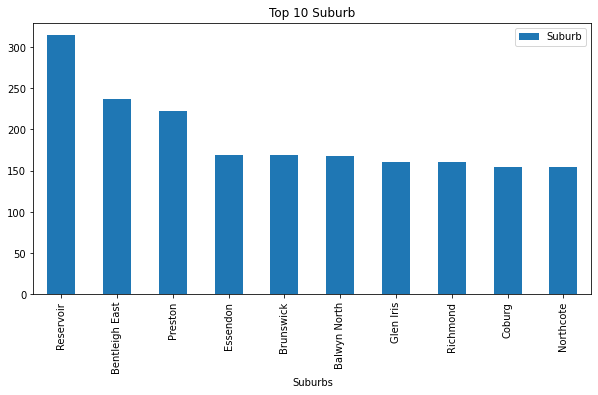

In [84]:
top_10_suburb = df.Suburb.value_counts().head(10)

top_10_suburb.plot(kind = 'bar', figsize=(10, 5), width = 0.5)
plt.title("Top 10 Suburb")
plt.xlabel("Suburbs")

plt.legend()

plt.show()

In [85]:
top_10_council = df.CouncilArea.value_counts().head(10)

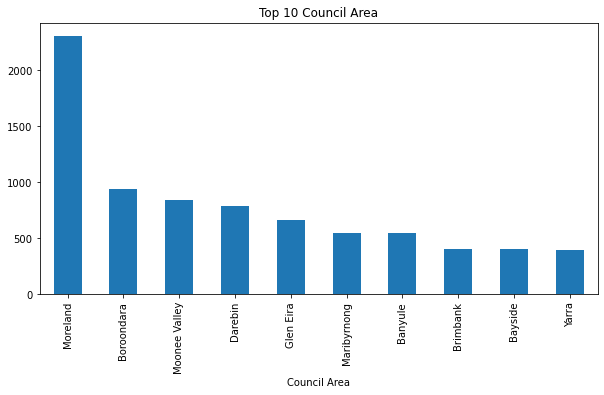

In [86]:
top_10_council.plot(kind = 'bar',
                    figsize = (10, 5),
                    width = 0.5,
                    edgecolor = None)

plt.title("Top 10 Council Area")

plt.xlabel("Council Area")

plt.show()